In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
import sqlite3 as sql

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Table Info

In [10]:
# Print out the field names and their type
# measurement
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
 # Earliest Date for Measurement
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [12]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=364)
print(query_date)

2016-08-24


In [13]:
# station
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [14]:
# retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-24', '2017-08-23')).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date = [prcp_results[0] for prcp_result in prcp_results[0:]]
prcp= [prcp_results[1] for prcp_result in prcp_results[0:]]
precipitation_df= pd.DataFrame(prcp_results[0:], 
                      columns=['date', 'prcp'] )
precipitation_df.set_index('date', inplace=True, )

# Sort the dataframe by date
precipitation_df.sort_values(by='date')
precipitation_df.head(5)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


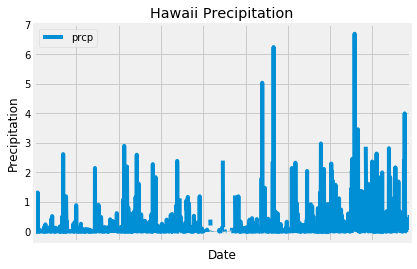

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot(rot=0)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Hawaii Precipitation")
ax.set_xticklabels([])
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset
data = engine.execute("SELECT station FROM Station")
number_of_stations = 0

for record in data:
    number_of_stations += 1
    
print(number_of_stations)

9


In [18]:
data = engine.execute("SELECT * FROM Station")

for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
data = engine.execute("SELECT id, station, count(station) FROM Measurement GROUP BY station ORDER BY count(station) DESC")

for record in data:
    print(record)

(12188, 'USC00519281', 2772)
(1, 'USC00519397', 2724)
(2725, 'USC00513117', 2709)
(9519, 'USC00519523', 2669)
(16939, 'USC00516128', 2612)
(5434, 'USC00514830', 2202)
(14960, 'USC00511918', 1979)
(7636, 'USC00517948', 1372)
(9008, 'USC00518838', 511)


Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station.

In [20]:
# Create a dataframe for the station id, the station code, and the temperature records
station_results = session.query(Station.id, Measurement.station, Measurement.tobs, Measurement.date)
station_id = [station_results[0] for station_results in station_results[0:]]
station_name = [station_results[1] for station_results in station_results[0:]]
temp = [station_results[2] for station_results in station_results[0:]]
date = [station_results[3] for station_results in station_results[0:]]
temp_df= pd.DataFrame(station_results[0:], 
                      columns=['station_id', 'station', 'temperature', 'date'])
temp_df.head()

,station_id,station,temperature,date
0,1,USC00519397,65.0,2010-01-01
1,1,USC00519397,63.0,2010-01-02
2,1,USC00519397,74.0,2010-01-03
3,1,USC00519397,76.0,2010-01-04
4,1,USC00519397,73.0,2010-01-06


In [21]:
#Calculate the lowest, highest, and average temperatures for the most active station (USC00519281)
temp_loc = temp_df.loc[(temp_df['station'] == 'USC00519281')]
lowest_temp = temp_loc['temperature'].min()
highest_temp = temp_loc['temperature'].max()
avg_temp = temp_loc['temperature'].mean()

print('The most active station is: USC00519281')
print(f'The lowest temperature recorded was {lowest_temp}')
print(f'The highest temperature recorded was {highest_temp}')
print(f'The average temperature for this station was {round(avg_temp, 2)}')

The most active station is: USC00519281
The lowest temperature recorded was 54.0
The highest temperature recorded was 85.0
The average temperature for this station was 71.66


In [22]:
# Choose the station with the highest number of temperature observations.
temperature_results = session.query(Measurement.station, Measurement.tobs).all()
station_temp = [temperature_results[0] for temperature_results in temperature_results[0:]]
tobs_temp = [temperature_results[1] for temperature_results in temperature_results[0:]]
highest_temp_df= pd.DataFrame(temperature_results[0:], 
                      columns=['station', 'temperature'] )


temp_group = highest_temp_df.groupby('station')
temp_observations = temp_group['temperature'].count()
temp_observations.sort_values(ascending=False)

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: temperature, dtype: int64

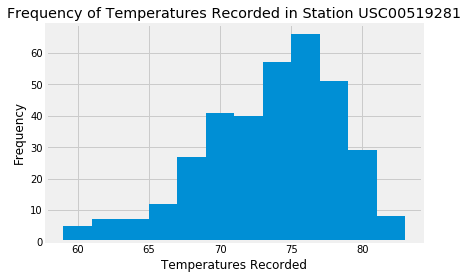

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_obvs = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-24').all()

# Create a list of the temperatures recorded
list_temp = [x[0] for x in temperature_obvs]
#print(list_temp)

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(list_temp, bins=12)
plt.xlabel("Temperatures Recorded")
plt.ylabel("Frequency")
plt.title("Frequency of Temperatures Recorded in Station USC00519281")
plt.show()

In [53]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    
    mask = (temp_df['date'] > start_date) & (temp_df['date'] <= end_date)
    temp_input = temp_df.loc[mask]
    TMIN = temp_input['temperature'].min() 
    TMAX = temp_input['temperature'].max()
    TAVG = round(temp_input['temperature'].mean(), 2)
    
    return (TMIN, TMAX, TAVG)

In [71]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calculation_test = calc_temps('2017-02-28', '2017-03-05')
calculation_test

(64.0, 78.0, 71.97)

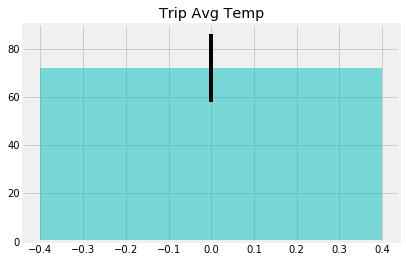

In [72]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
TMIN, TMAX, TAVG = calculation_test[0],calculation_test[1],calculation_test[2] 
TMIN, TMAX, TAVG
plt.bar(0, TAVG, color='c', alpha=.5, yerr=[TMAX - TMIN])
plt.title("Trip Avg Temp")
plt.show()

In [113]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    group_by(Measurement.station).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date > '2017-02-28', Measurement.date > '2017-03-05').\
    order_by(func.sum(Measurement.prcp).desc()).all()

for c in rainfall:
    print(c)


('MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 52.01000000000003)
('WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 30.129999999999985)
('KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 21.109999999999992)
('WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 16.38)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 13.949999999999994)
('WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 3.8299999999999983)
('PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.19)
